###### 겨리 - 2020/12/22
### **행렬의 연산**
#### 행렬 연산의 파이썬 활용(with. Numpy)
#### - 연산 : 
#####  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    1. 행렬의 덧셈
#####  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    2. 행렬의 스칼라배
#####  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    3. 행렬의 곱셈

In [4]:
import numpy as np
import random

In [5]:
#랜덤 행렬 생성(1~20 사이의 정수)
def random_matrix(rows,cols, max_no=10):
    row_list=[]
    for r in range(rows):
        col_list=[]
        for c in range(cols):
            col_list.append(float(random.randint(0,max_no))) #float형으로 변환함
        row_list.append(col_list)
        
    return np.array(row_list) #넘파이 배열 형태로 변환

A=random_matrix(2,2)
B=random_matrix(2,2)

### 0. 행렬의 정의

In [6]:
print("행렬 A는")
print(A, "\n")
print("행렬 B는")
print(B)

행렬 A는
[[ 9. 10.]
 [ 5.  9.]] 

행렬 B는
[[9. 3.]
 [1. 5.]]


# 
### 1.행렬의 덧셈
##### 동일한 위치에 있는 원소끼리 더한다.

In [7]:
print(A+B)

[[18. 13.]
 [ 6. 14.]]


# 
### 2. 행렬의 스칼라배
##### 모든 원소에 3이 곱해진다.

In [8]:
print(3*A)

[[27. 30.]
 [15. 27.]]


# 
### 3. 행렬의 곱셈
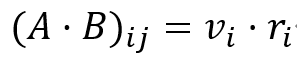

##### 전제 : 행렬 A의 열 갯수 = 행렬 B의 행 갯수
##### 정의 : A x B일 때, A의 i행과 B의 j열을 Dot Product하여 (i,j)에 위치시킨다.
##### 실제로는 Dot Product는 아님
###### *파이썬에서 일반적으로 배열의 곱을 하면, 각 배열의 동일한 자릿수끼리만 곱해진다.

#### 행렬곱 연산의 정확한 정의
##### 행렬 A의 a행 벡터 / B의 b열 벡터의 곱(a행벡터를 열벡터로 변환하여 열벡터 x 열벡터 연산 수행)
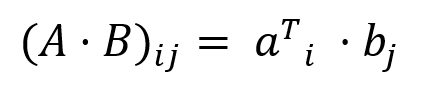

In [9]:
def matrix_multiplication(A,B):
    n = len(B) #B의 열(= A의 행) 수의 제곱만큼 연산 수행하여 n차 정방행렬 추출
    
    multiple = np.zeros((n,n))
    temp_list=[]
    for i in range(n): #A행렬의 행 추출 반복
        for j in range(n): #B행렬의 열 추출 반복
            temp_var = 0
            temp_array = A[i,:] * B[:,j] #A의 i행과 B의 j열을 곱셈(같은 순서를 가진 원소끼리 따로 곱해줌)
            for num in temp_array: 
                temp_var += num #곱해진 원소끼리 모두 더해서 하나의 값을 반환
            multiple[i,j] = temp_var #점곱의 결과 행렬의 해당 위치에 배치
    return multiple             

In [10]:
matrix_multiplication(A,B)

array([[91., 77.],
       [54., 60.]])

In [11]:
np.dot(A,B)

array([[91., 77.],
       [54., 60.]])

##### Numpy에서 기본적으로 제공하는 np.dot 메소드와 결괏값이 동일하게 나오는 것을 확인

# 
### 4. 단위행렬(항등행렬, Identity Matrix)
##### 정사각행렬 중 대각성분은 모두 1이고, 그 외 성분인 모두 0인 행렬)

In [12]:
def identity_matrix(dim):
    idt_matrix=[]
    for i in range(dim):
        row = np.zeros(dim) #모든 (나머지) 원소의 값을 0으로
        row[i]=1 #(i,i)번째 원소의 값만 1
        idt_matrix.append(row)
    idt_matrix=np.array(idt_matrix)
    return idt_matrix

In [13]:
I = identity_matrix(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### 단위행렬의 성질
##### 단위행렬에 (연산 가능한) 행렬 A를 곱한 결과는 A

In [14]:
A=random_matrix(3,3)
A

array([[4., 3., 1.],
       [7., 5., 4.],
       [2., 9., 5.]])

In [43]:
np.dot(I,A)

array([[ 4., 11., 10.],
       [ 4., 10., 20.],
       [10., 15., 11.]])

##### 일반적으로 행렬 곱셈은 교환법칙이 성립하지 않지만 단위행렬의 경우 어느쪽에 위치하여도 같은 결과를 나타냄
###### * 단, 행렬 A,I가 n차 정방행렬일 때

In [44]:
np.dot(A,I)

array([[ 4., 11., 10.],
       [ 4., 10., 20.],
       [10., 15., 11.]])

### 4-1. 기본행렬(Elementary Matrix)
##### 단위행렬에 기본행연산을 1회 이상 수행한 행렬
##### 1. 기본행렬은 n차 정사각행렬(단위행렬의 변형)
##### 2. 기본행렬은 선형사상이기도 함
##### 3. 기본행렬은 전단사함수이면서 가역행렬 : 단위행렬에서 생성되었으므로

In [23]:
I = identity_matrix(3)
print("단위행렬")
print(I, "\n")


E = I.copy()
E[0], E[1] = E[1].copy(), E[0].copy()
print("1. 행 교환 연산 수행")
print(E, "\n")


E = I.copy()
E[0] *= 3
print("2. 상수배 연산 수행")
print(E, "\n")

E = I.copy()
E[0] += 2*E[1]
print("3.다른 행의 상수배 덧셈 수행")
print(E)

단위행렬
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

1. 행 교환 연산 수행
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

2. 상수배 연산 수행
[[3. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

3.다른 행의 상수배 덧셈 수행
[[1. 2. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


##### 기본행 연산을 수행한 단위행렬에 다른행렬을 곱하면 다른행렬을 단위행 연산한 것과 같음

In [34]:
print("변환 전 행렬")
A=random_matrix(3,3)
print(A,"\n") 
E = I.copy()
E[0] += 2*E[1]



print("1.행 교환 연산 수행")
E = I.copy()
E[0], E[1] = E[1].copy(), E[0].copy()
print("기본행렬")
print(E,"\n")

E2 = np.dot(E,A)
print("변환된 행렬")
print(E2,"\n","\n")


print("2.상수배 연산 수행")
E = I.copy()
E[0] *= 3
print("기본행렬")
print(E,"\n")

E2 = np.dot(E,A)
print("변환된 행렬")
print(E2,"\n","\n")



print("3.다른 행의 상수배 덧셈 수행")
E = I.copy()
E[0] += 2*E[1]
print("기본행렬")
print(E,"\n")

E2 = np.dot(E,A)
print("변환된 행렬")
print(E2)

변환 전 행렬
[[ 8.  0.  7.]
 [ 4.  2.  5.]
 [10.  4.  7.]] 

1.행 교환 연산 수행
기본행렬
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

변환된 행렬
[[ 4.  2.  5.]
 [ 8.  0.  7.]
 [10.  4.  7.]] 
 

2.상수배 연산 수행
기본행렬
[[3. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

변환된 행렬
[[24.  0. 21.]
 [ 4.  2.  5.]
 [10.  4.  7.]] 
 

3.다른 행의 상수배 덧셈 수행
기본행렬
[[1. 2. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

변환된 행렬
[[16.  4. 17.]
 [ 4.  2.  5.]
 [10.  4.  7.]]



# 
### 5. 역행렬(Inverse Matrix)과 영인자(Zero Divisor)
#### 1. 역행렬
##### A × X = X × A = I(I는 항등행렬)의 조건을 만족하는 행렬 * n차 정사각행렬
##### 역행렬은 행렬 A에 대해 하나만 존재함

#### 2차 정방행렬의 역행렬 공식 
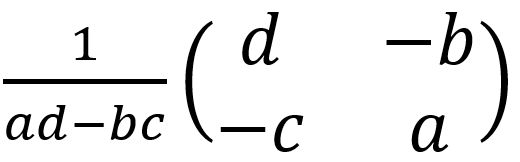

#### 역행렬 계산 함수 1 : 행렬과 역행렬의 곱과 단위행렬 I를 연립방정식 형태로 푸는 방법

In [50]:
def inverse_matrix(matrix):
    dim = len(A)
    queue=[] #확장행렬의 원소나열규칙을 사전에 큐에 저장해두고 하나씩 꺼냄(FIFO)
    for i in range(dim):
        num = i
        for j in range(dim):
            queue.append(num)
            num +=dim
    queue*= dim**2 # n차원 행렬에서 생성되는 확장행렬의 행은 n^2개이며, 각 행마다 n개의 변수가 있으므로 규칙을 확장

    #확장행렬을 생성하고 초깃값을 0으로 지정
    zero_array = np.zeros((dim**2,dim**2+1))


    for row_no in range(dim**2): #결과 행렬의 행 수만큼 반복
        temp_row = A[row_no//dim]
        for j in range(dim):
            idx = queue.pop(0) 
            zero_array[row_no,idx] = temp_row[j] #i행의 idx열에 대입

        if row_no%(dim+1) == 0:  #결괏값인 단위행렬을 연립방정식의 마지막 열에 구현
            zero_array[row_no, -1] = 1
            
    #사전 정의된 가우스-조르당 소거법 함수가 필요
    echelon_form=gauss_jordan_elimination(zero_array)
    elements=np.array(echelon_form[:,-1])
    inverse_matrix=elements.reshape(dim,-1)
    return inverse_matrix

#### n차원 함수 A를 생성

In [51]:
A=random_matrix(5,5)
A

array([[14., 12., 12., 20., 20.],
       [ 6., 17., 20., 19., 15.],
       [ 6.,  1., 18., 15., 19.],
       [ 9., 19.,  5., 19., 17.],
       [14., 10.,  1.,  3.,  5.]])

In [52]:
#### A의 역행렬 함수인 A_1을 계산

In [53]:
A_1 = inverse_matrix(A)
A_1

array([[ 0.13063308, -0.00186068, -0.06103926, -0.09167234,  0.02668482],
       [-0.14560926,  0.02795553,  0.03902882,  0.08463808,  0.06249149],
       [-0.02886317,  0.0593828 ,  0.02121625, -0.04992058,  0.02641253],
       [ 0.33005446,  0.02869299, -0.20507148, -0.13512594, -0.167597  ],
       [-0.26681416, -0.07979351,  0.21165192,  0.17846608,  0.09557522]])

#### 역행렬 계산함수 2 : 블록행렬(분할행렬)을 사용하는 방법
#### 행렬 A를 기본행연산을 통해 단위행렬로 변환하는 과정
#### 기본행 연산 E1, E2 ... Ek를 반대로 곱한 것이 역행렬이 됨 -> 구현 X

#### 검증, n차 단위행렬 I가 출력됨
##### np.round를 하지 않으면 1에 근사한 무리수가 출력됨(파이썬 소수 연산의 제한)
##### np.abs를 적용할 필요는 없으나, 깔끔한 표기를 위해 사용

In [224]:
np.abs(np.round(np.dot(A,A_1)))

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#### 2. 가역행렬(invertible) : 역행렬이 존재하는 행렬
#### 2차 정방행렬의 경우 판별식(determinant) : det(A) = ad-bc != 0 인 경우 가역 행렬, det(A) = |A|로 표기하기도 함
##### <-> 비가역행렬(=특이행렬) : 역행렬이 존재하지 않는 행렬
##### 
##### 행렬 A와 B가 가역행렬이라면 AB도 가역행렬, 단, (AB)^(-1) = B^(-1) × A^(-1) (순서가 변함)

#### 3. 행렬의 지수
##### A^n은 A를 n번 곱한 것
##### A^(-1) : A^n의 역행렬 = A^(-1)을 n번 곱한 것  *단 A는 정방행렬(=제곱가능)이면서 가역행렬(=역행렬 존재)

##### 기존에 정의했던 함수

### 5. 전치행렬(Transposed Matrix)
#### 행렬을 대각선을 기준으로 대칭
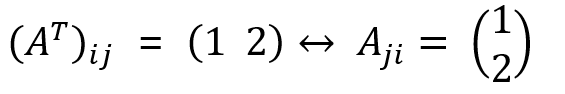

#### 전치행렬의 성질
##### 1. 전치를 두 번 하면 원래의 행렬로 돌아감
##### 2. (A+B)의 전치행렬과 A, B의 전치행렬의 합은 동일
##### 3. 상수배의 위치 교환
##### 4. 연산의 교환법칙 성립
##### 5. 전치행렬에 가역성 유지

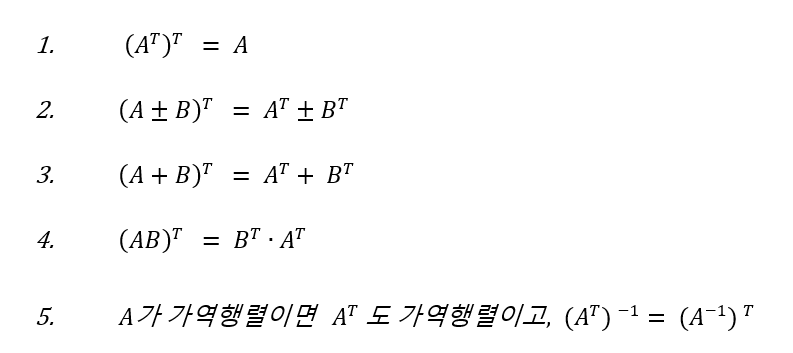

In [35]:
A.reshape(len(A),-1)

array([[ 8.,  0.,  7.],
       [ 4.,  2.,  5.],
       [10.,  4.,  7.]])

### 6. 대각합(trace) : 정방행렬의 대각성분들의 합
##### 1. 대각합  = sum(A[i][i])
##### 2. 행렬 A의 대각합과 A의 전치행렬의 대각합은 같음
##### 3. 대각합에 상수배를 한 것과 행렬에 상수배하여 대각합을 구한 것은 같음
##### 4. 행렬 A와 B의 대각합의 합은 행렬 A+B의 대각합과 같음
##### 5. AB의 대각합과 BA의 대각합이 같음


# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 

In [40]:
#랜덤 행렬 생성(1~20 사이의 정수)
def random_matrix(rows,cols, max_no=20):
    row_list=[]
    for r in range(rows):
        col_list=[]
        for c in range(cols):
            col_list.append(float(random.randint(1,max_no))) #float형으로 변환함
        row_list.append(col_list)
        
    return np.array(row_list) #넘파이 배열 형태로 변환

def gauss_jordan_elimination(matrix):
    
    #행렬의 가로 세로 
    mcol = len(matrix[0])
    mrow = len(matrix)
    row_count = 0 #연산 중인 열을 지시

    
    
    #입력 행렬의 1차 검증 : 값이 모두 0인 열이 있는지 -> 변수의 값을 구할 수 없음
    idx = 0
    for c in range(mcol): #열
        for r in range(mrow): #행
            idx += matrix[r][c]

        if idx == 0: #첫 열이 모두 0
            print(c+1,"열 의 값이 모두 0입니다.")
            return 
            
    #2차 검증 : 행/열의 갯수
        if mrow != mcol - 1: #변수의 갯수(결괏값을 제외한 열의 갯수)와 행의 갯수가 일치하여야 함
            print("해가 무수히 많거나 없습니다.")
            return 

        
    #1. 가우스 소거법 : Leading 1(선행원소 1)을 찾기 위한 알고리즘
    for col_count in range(mcol-1): #선행 원소 아래의 값(열 하단)이 0이 될때까지 반복 수행
        comp_num = np.inf # 비교할 숫자의 기본값을 무한대로 지정(보다 작은 수)
        
        
        # 첫 열이 1이거나, 0이 아닌 수 중 가장 작은 행을 추출
        for i in range(row_count,mrow):
            if (0 < abs(matrix[i][col_count])) & (abs(matrix[i][col_count]) < abs(comp_num)) : 
                comp_num = matrix[i][col_count] #절댓값이 가장 작은 첫 행의 값

                first_row = i #첫 행으로 사용할 행
                if matrix[i][0] == 1: #1을 찾은 경우 
                    break


        matrix[first_row]=matrix[first_row]/comp_num  #첫 행의 첫 열을 1로 변환
        matrix[first_row], matrix[row_count] = matrix[row_count].copy(), matrix[first_row].copy() #대상 인덱스와 첫 행을 교환


        #선행원소를 1로 만드는 과정
        for j in range(row_count+1,mrow):
            if matrix[j][col_count] != 0:
                con_no = matrix[j][col_count]
                matrix[j] = matrix[j] - con_no * matrix[row_count]

            
        #이미 Leading 1을 찾은 행을 연산에서 제외
        row_count += 1

        
    # 2. Back Substitution(가우스-조르당 소거법) : 기약사다리꼴 형태로 변환
    for col in range(mcol-2,0,-1):
        for row in range(col-1,-1,-1): #col/row를 파이썬 인덱스에 맞게 적용
            const = matrix[row][col] * -1 #constraint
            matrix[row] += const * matrix[col]
            
    return  matrix